In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import classlib4334
import scipy.optimize as opt

## Problem 1

### Find a polynomial model for each dataset that fits both of them well.

In [3]:
df_brake_1 = pd.read_excel("hw-02a-data/braking-distance-1.xlsx")
df_brake_2 = pd.read_excel("hw-02a-data/braking-distance-2.xlsx")

In [4]:
df_brake_1.head()

,Unnamed: 0,Speed [mph],Speed [m/s],Distance [m]
0,0,5,2.233333,2.582413
1,1,10,4.466667,5.794310
2,2,15,6.700000,8.232972
3,3,20,8.933333,14.569328
4,4,25,11.166667,19.234684


In [5]:
df_brake_2.head()

,Unnamed: 0,Speed [mph],Speed [m/s],Distance [m]
0,0,5,2.233333,1.459010
1,1,10,4.466667,2.341386
2,2,15,6.700000,5.733606
3,3,20,8.933333,6.471559
4,4,25,11.166667,9.348217


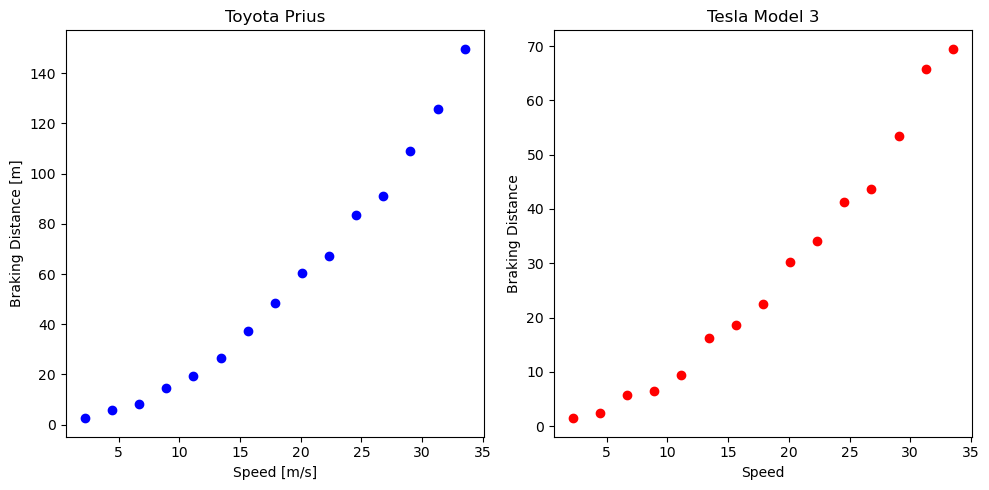

In [6]:
plt.figure(figsize=(10, 5))

# Plot the data from the first run
plt.subplot(1, 2, 1)
plt.scatter(df_brake_1['Speed [m/s]'], df_brake_1['Distance [m]'], color='blue', label='Toyota Prius Data')
plt.title('Toyota Prius')
plt.xlabel('Speed [m/s]')
plt.ylabel('Braking Distance [m]')

# Plot the data from the second run
plt.subplot(1, 2, 2)
plt.scatter(df_brake_2['Speed [m/s]'], df_brake_2['Distance [m]'], color='red', label='Tesla Model 3 Data')
plt.title('Tesla Model 3')
plt.xlabel('Speed')
plt.ylabel('Braking Distance')

plt.tight_layout()
plt.savefig("plots/raw-data-cars.png")
plt.show()

In [7]:
def p1(x, a, b):
    return a + b*x

def p2(x, a, b, c):
    return a + b*x + c*x**2

def p3(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

def p4(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

def p5(x, a, b, c, d, e, f):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

def p6(x, a, b, c, d, e, f, g):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6

def p7(x, a, b, c, d, e, f, g, h):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7

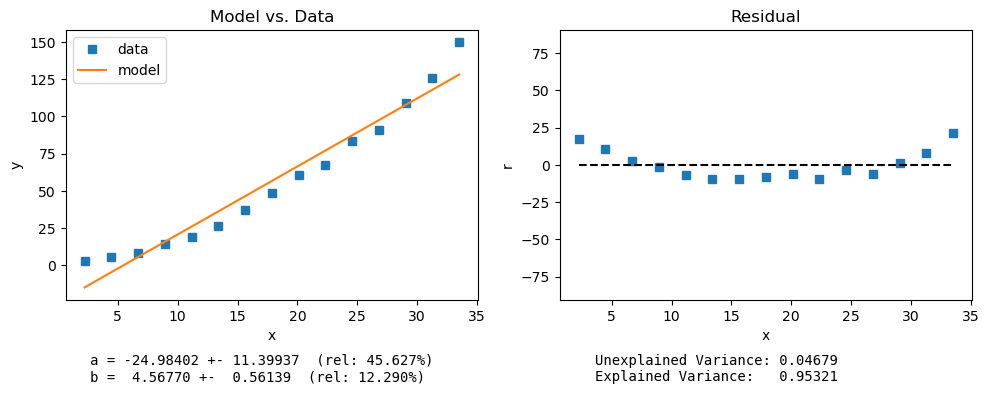

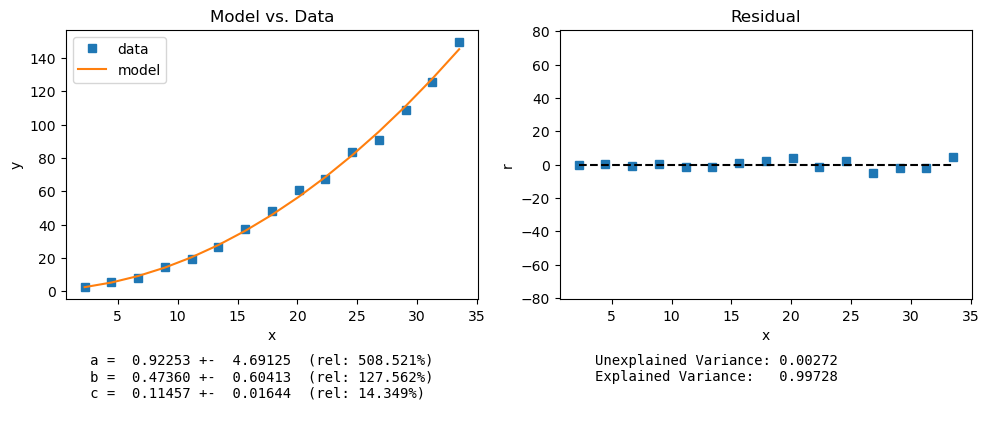

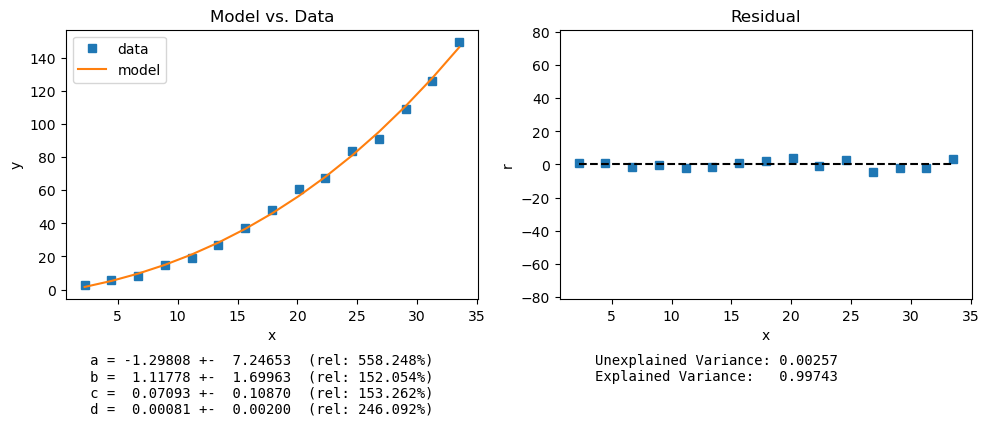

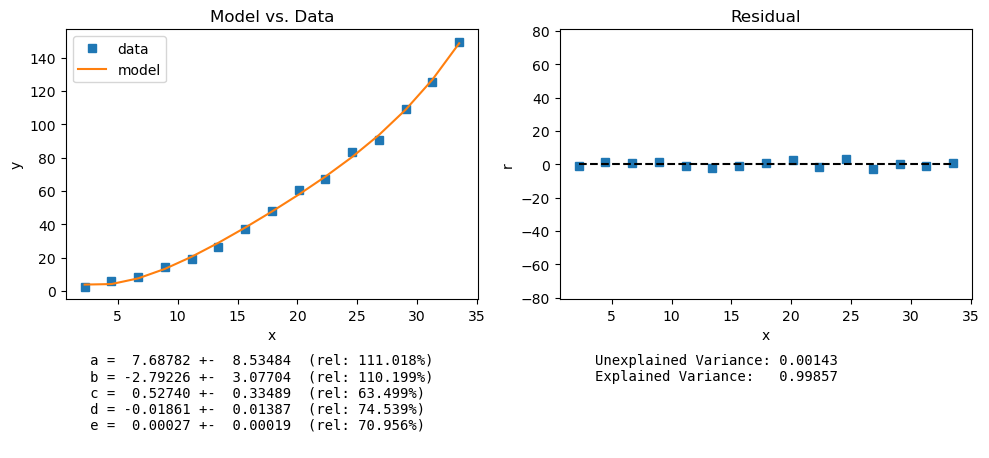

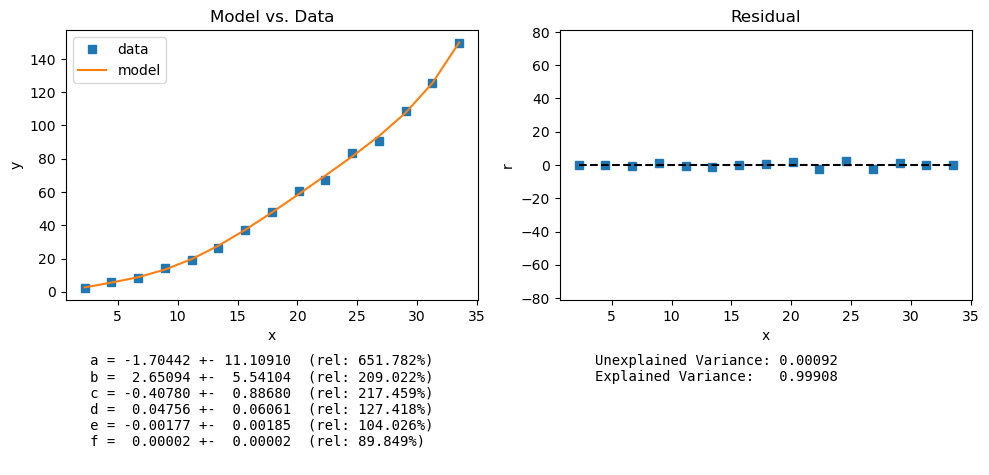

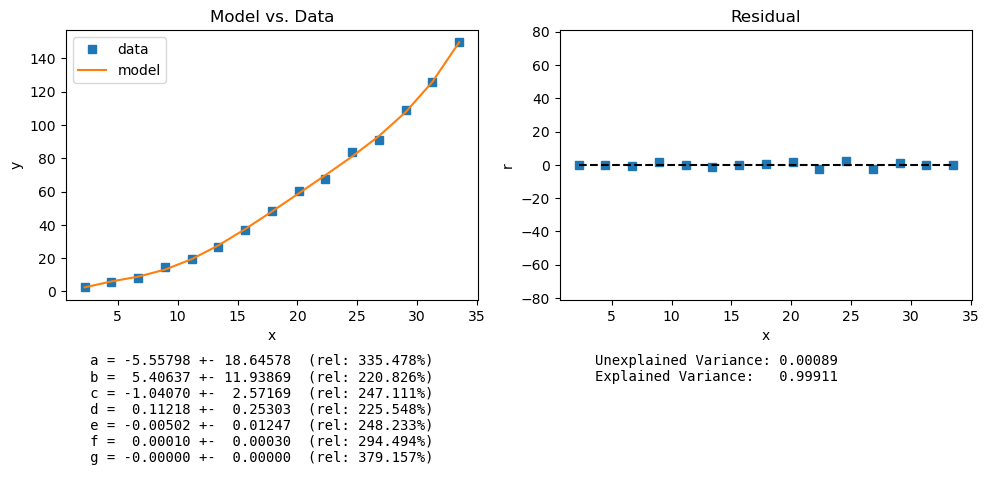

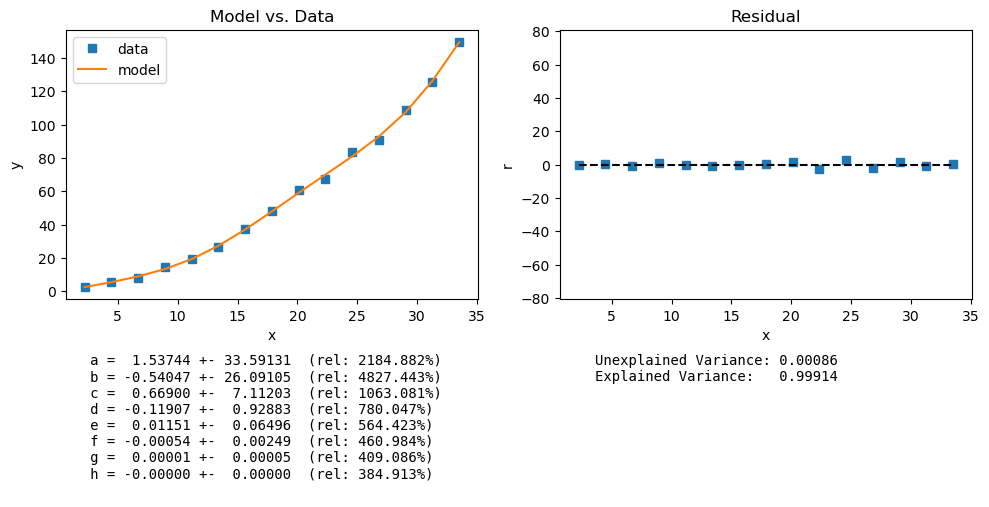

In [8]:
x = df_brake_1["Speed [m/s]"]
y = df_brake_1["Distance [m]"]
fit1, err1 = classlib4334.fit_and_plot(p1, x, y, residual=True)
fit2, err2 = classlib4334.fit_and_plot(p2, x, y, residual=True)
fit3, err3 = classlib4334.fit_and_plot(p3, x, y, residual=True)
fit4, err4 = classlib4334.fit_and_plot(p4, x, y, residual=True)
fit5, err5 = classlib4334.fit_and_plot(p5, x, y, residual=True)
fit6, err6 = classlib4334.fit_and_plot(p6, x, y, residual=True)
fit7, err7 = classlib4334.fit_and_plot(p7, x, y, residual=True)

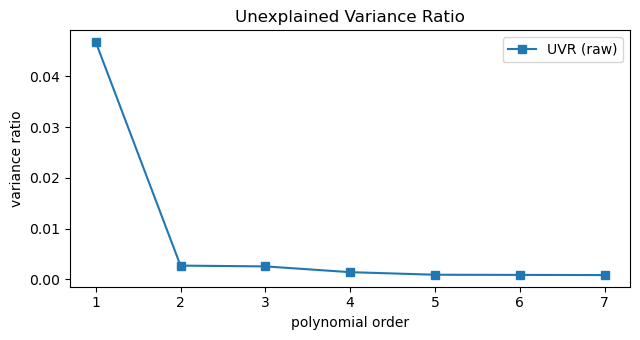

In [9]:
pvals = [1, 2, 3, 4, 5, 6, 7]
models = [p1, p2, p3, p4, p5, p6, p7]

uvrs = []
evrs = []
for n, f in zip(pvals, models):
    pfit, pcov = opt.curve_fit(f, x, y)
    ymean = np.mean(y)
    ypred = f(x, *pfit)
    ssres = np.sum((y - ypred)**2)
    sstot = np.sum((y - ymean)**2)
    N = len(y)
    P = len(pfit)
    uvr = ssres/sstot
    evr = 1-uvr
    uvrs.append(uvr)
    evrs.append(evr)

fig, ax = plt.subplots(figsize=(6.5,3.5))
ax.plot(pvals, uvrs, 's-', label="UVR (raw)")
ax.set_xlabel('polynomial order')
ax.set_ylabel('variance ratio')
ax.set_title('Unexplained Variance Ratio')
ax.legend(loc='best')
ax.set_xticks(pvals)
fig.tight_layout()
plt.show()

In [10]:
def p2xa(x, b, c):
    return b*x + c*x**2
def p2xab(x, c):
    return c*x**2

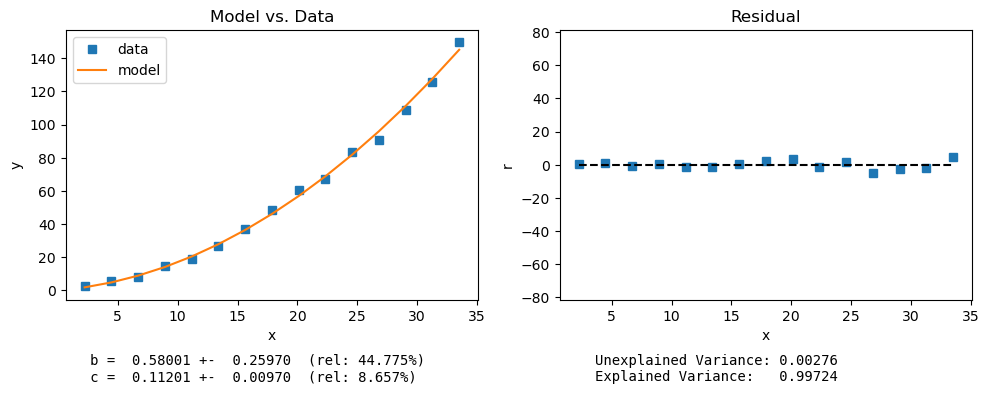

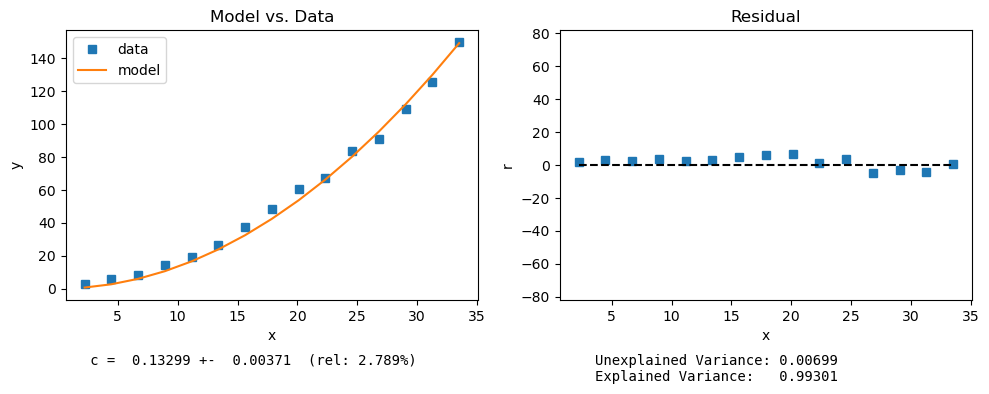

In [11]:
fit2xa, err2xa = classlib4334.fit_and_plot(p2xa, x, y, residual=True)
fit2xab, err2xab = classlib4334.fit_and_plot(p2xab, x, y, residual=True)

In [12]:
classlib4334.compare_nested(x, y, p2xa, p2)

F-test comparing p2xa (simple) vs. p2 (complex)

  Simple:   SS=84.287947, DOF=  13
  Complex:  SS=83.215280, DOF=  12
  F-number: 0.1547 
  P-value:  0.7010 
  Random?   70.100%

It is recommended to prefer the simple function.



(0.15468311475924532, 0.7009976054852911)

In [13]:
classlib4334.compare_nested(x, y, p2xab, p2xa)

F-test comparing p2xab (simple) vs. p2xa (complex)

  Simple:   SS=213.648950, DOF=  14
  Complex:  SS=84.287947, DOF=  13
  F-number: 19.9518 
  P-value:  0.0006 
  Random?   0.063%

It is recommended to prefer the complex function.



(19.951761852013167, 0.0006348180435515368)

In [14]:
p2xa(44.704, *fit2xa) 

249.77881474057008

### Justify the order of, and terms in, the polynomial you chose

### Record the polynomial co-efficients you obtained (for future use)

### Use your model to predict the braking distance for each case if the speed were 100 mph.

### Discuss whether your prediction seems reasonable, and any limitations that should be considered.

In [15]:
df_brake_2.head()

,Unnamed: 0,Speed [mph],Speed [m/s],Distance [m]
0,0,5,2.233333,1.459010
1,1,10,4.466667,2.341386
2,2,15,6.700000,5.733606
3,3,20,8.933333,6.471559
4,4,25,11.166667,9.348217


In [16]:
x = df_brake_2["Speed [m/s]"]
y = df_brake_2["Distance [m]"]

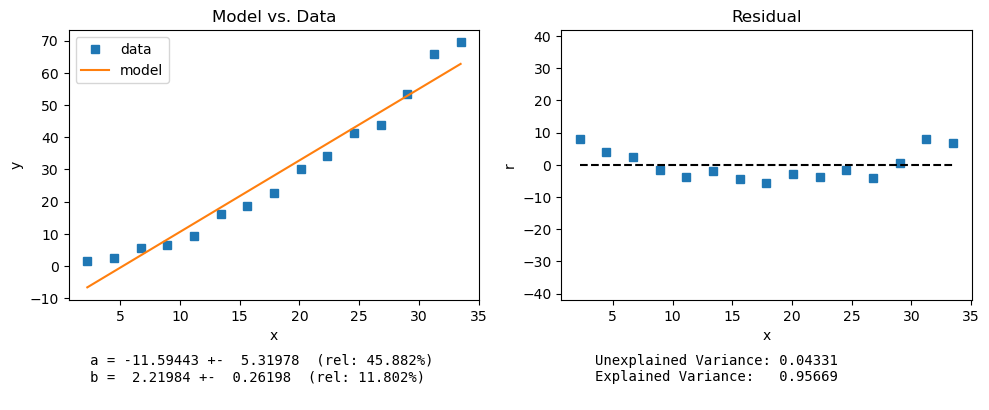

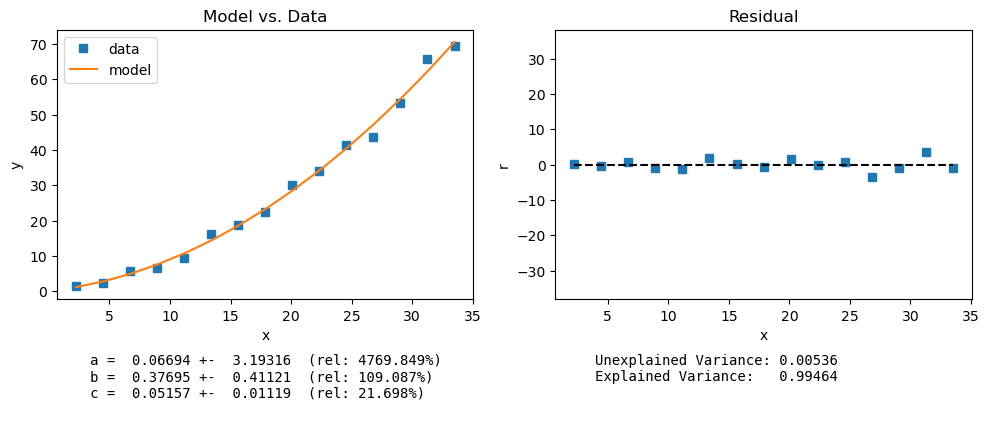

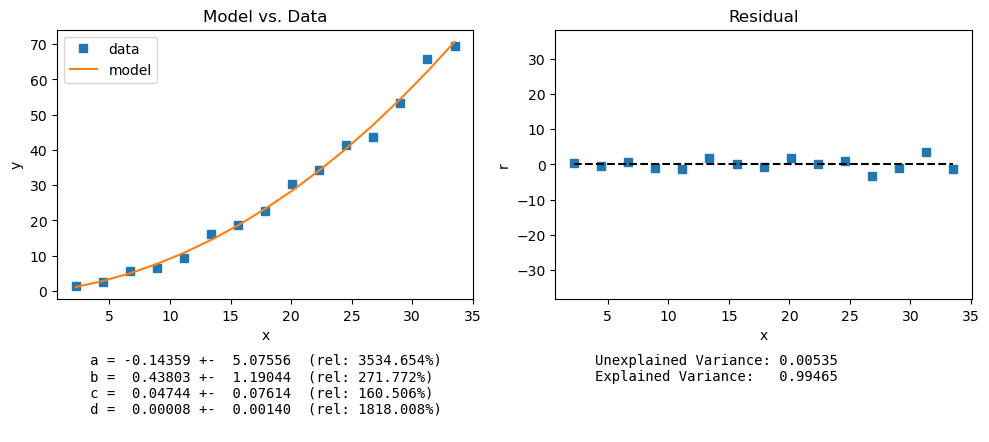

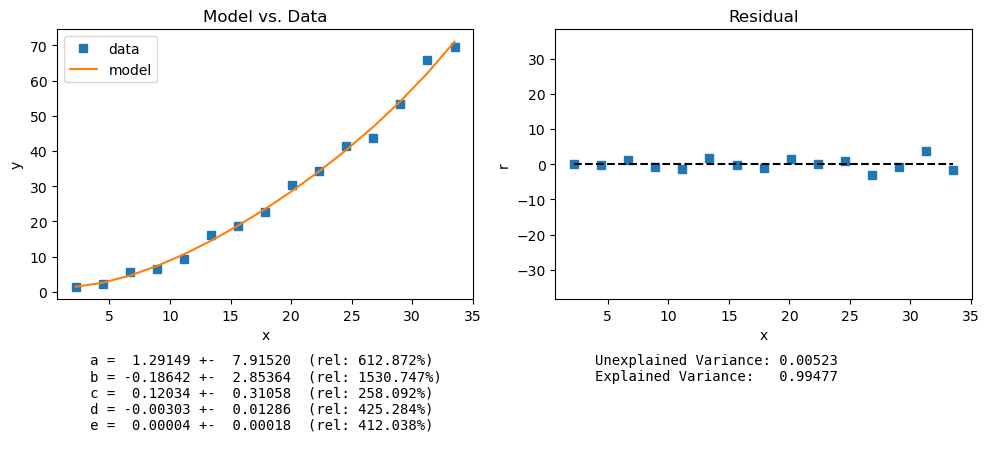

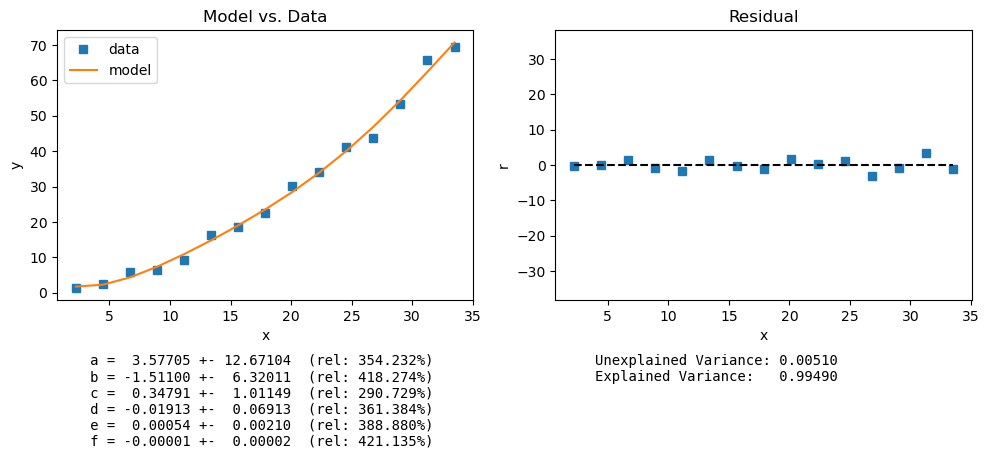

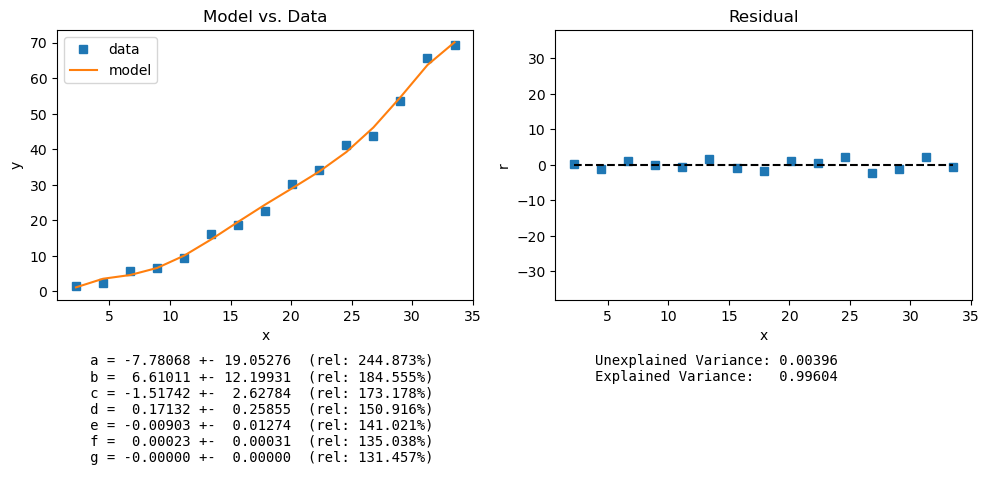

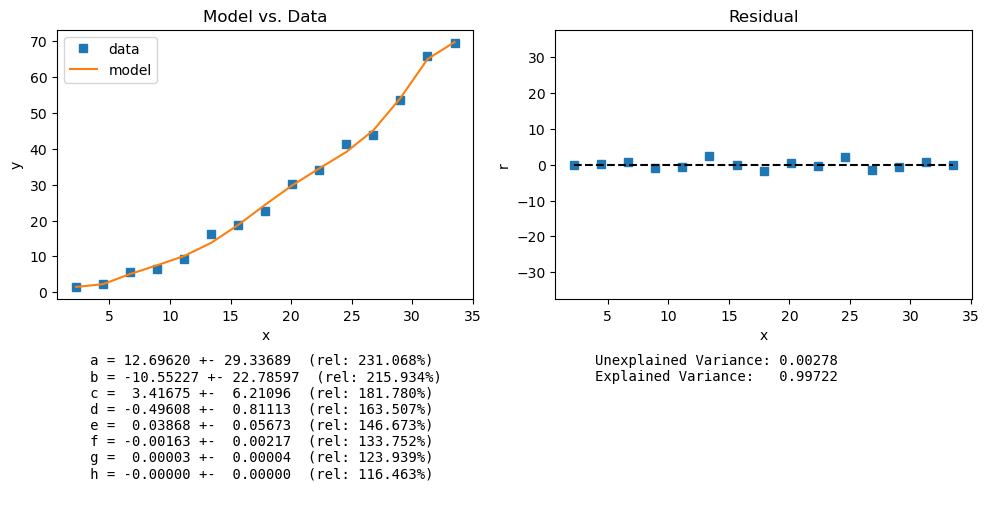

In [17]:
fit1, err1 = classlib4334.fit_and_plot(p1, x, y, residual=True)
fit2, err2 = classlib4334.fit_and_plot(p2, x, y, residual=True)
fit3, err3 = classlib4334.fit_and_plot(p3, x, y, residual=True)
fit4, err4 = classlib4334.fit_and_plot(p4, x, y, residual=True)
fit5, err5 = classlib4334.fit_and_plot(p5, x, y, residual=True)
fit6, err6 = classlib4334.fit_and_plot(p6, x, y, residual=True)
fit7, err7 = classlib4334.fit_and_plot(p7, x, y, residual=True)

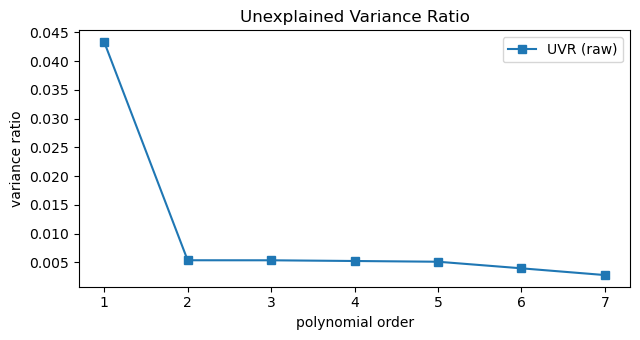

In [18]:
pvals = [1, 2, 3, 4, 5, 6, 7]
models = [p1, p2, p3, p4, p5, p6, p7]

uvrs = []
evrs = []
for n, f in zip(pvals, models):
    pfit, pcov = opt.curve_fit(f, x, y)
    ymean = np.mean(y)
    ypred = f(x, *pfit)
    ssres = np.sum((y - ypred)**2)
    sstot = np.sum((y - ymean)**2)
    N = len(y)
    P = len(pfit)
    uvr = ssres/sstot
    evr = 1-uvr
    uvrs.append(uvr)
    evrs.append(evr)

fig, ax = plt.subplots(figsize=(6.5,3.5))
ax.plot(pvals, uvrs, 's-', label="UVR (raw)")
ax.set_xlabel('polynomial order')
ax.set_ylabel('variance ratio')
ax.set_title('Unexplained Variance Ratio')
ax.legend(loc='best')
ax.set_xticks(pvals)
fig.tight_layout()
plt.show()

In [19]:
classlib4334.compare_nested(x, y, p2, p3)

F-test comparing p2 (simple) vs. p3 (complex)

  Simple:   SS=38.553640, DOF=  12
  Complex:  SS=38.511268, DOF=  11
  F-number: 0.0121 
  P-value:  0.9144 
  Random?   91.438%

It is recommended to prefer the simple function.



(0.012102837492416906, 0.9143805801757022)

In [20]:
classlib4334.compare_nested(x, y, p2xab, p2xa)

F-test comparing p2xab (simple) vs. p2xa (complex)

  Simple:   SS=95.460570, DOF=  14
  Complex:  SS=38.559288, DOF=  13
  F-number: 19.1839 
  P-value:  0.0007 
  Random?   0.074%

It is recommended to prefer the complex function.



(19.183877445639208, 0.0007446870387685946)

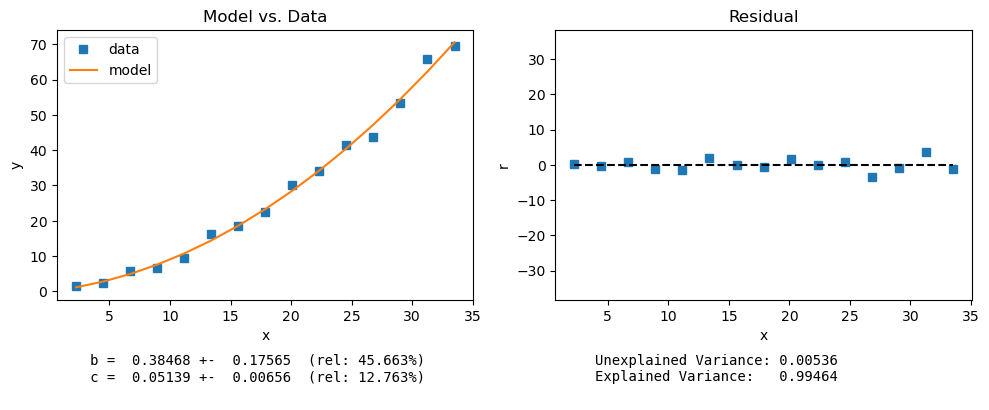

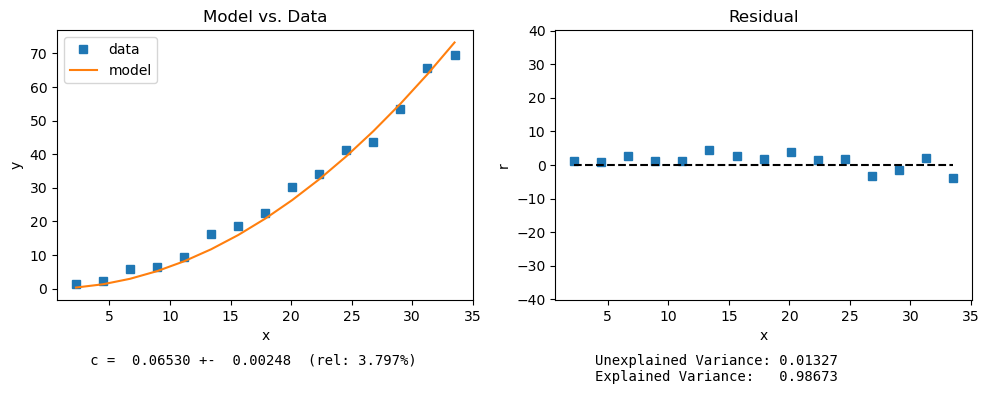

In [21]:
fit2xa, err2xa = classlib4334.fit_and_plot(p2xa, x, y, residual=True)
fit2xab, err2xab = classlib4334.fit_and_plot(p2xab, x, y, residual=True)

In [24]:
p2xa(44.704, *fit2xa)

119.89162308563735

## Exercise 2

In [25]:
df1: pd.DataFrame = pd.read_excel("hw-02a-data/algorithm-runtime-1.xlsx")
df2: pd.DataFrame = pd.read_excel("hw-02a-data/algorithm-runtime-2.xlsx")

In [27]:
df1

,Inputs,Runtime [ms]
0,50,1747
1,100,7503
2,150,18822
3,200,37017
4,250,63689
5,300,101061
6,350,148078
7,400,209952
8,450,283238
9,500,377161


In [28]:
df2

,Inputs,Runtime [ms]
0,50,13658
1,100,53006
2,150,119230
3,200,211599
4,250,333941
5,300,478334
6,350,666556
7,400,869785
8,450,1120466
9,500,1382505


In [29]:
x = df1["Inputs"]
y = df1["Runtime [ms]"]

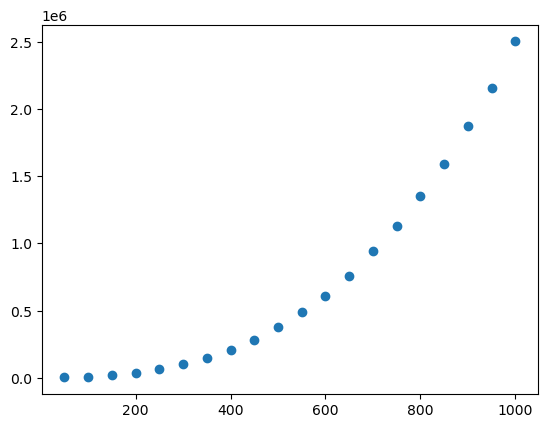

In [32]:
plt.scatter(x, y)
plt.savefig("plots/alg1-scatter.png")

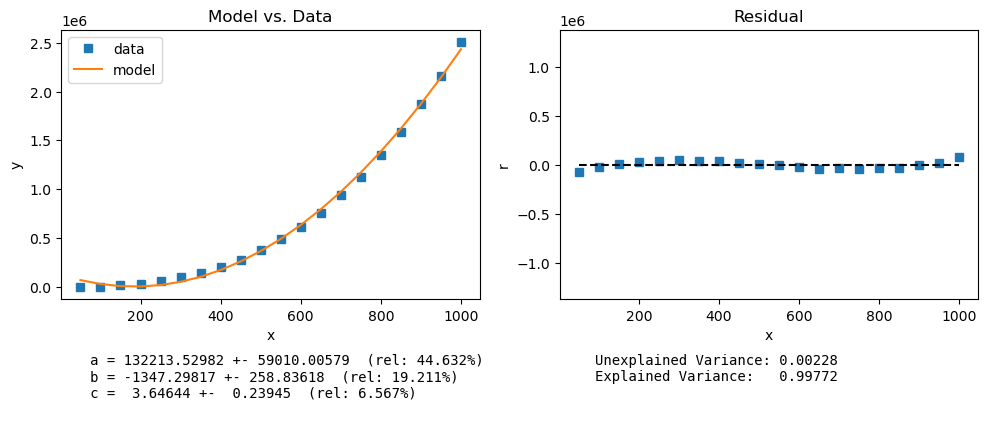

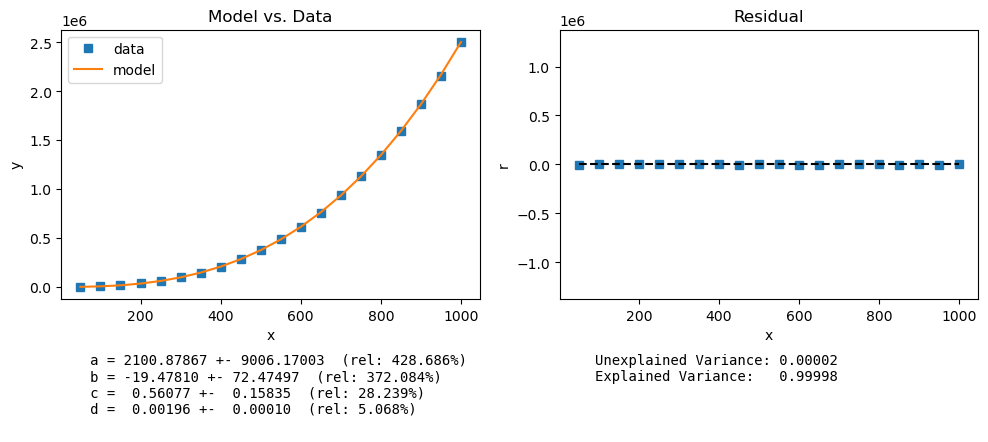

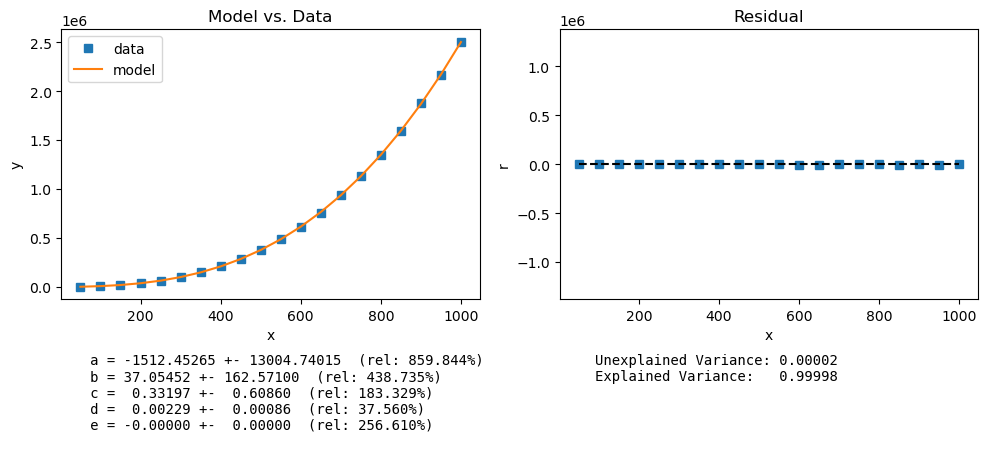

In [33]:
fit2, err2 = classlib4334.fit_and_plot(p2, x, y, residual=True)
fit3, err3 = classlib4334.fit_and_plot(p3, x, y, residual=True)
fit4, err4 = classlib4334.fit_and_plot(p4, x, y, residual=True)

In [34]:
classlib4334.compare_nested(x, y, p4, p3)

F-test comparing p4 (simple) vs. p3 (complex)

  Simple:   SS=261331717.488155, DOF=  15
  Complex:  SS=271914068.245163, DOF=  16
  F-number: 0.6227 
  P-value:  nan 
  Random?   nan%

It is recommended to prefer the simple function.



(0.6226879440436404, nan)

In [39]:
def p3xa(x, b, c, d):
    return b*x + c*x**2 + d*x**3
def p3xab(x, c, d):
    return c*x**2+ d*x**3
def p3xabc(x, d):
    return d*x**3

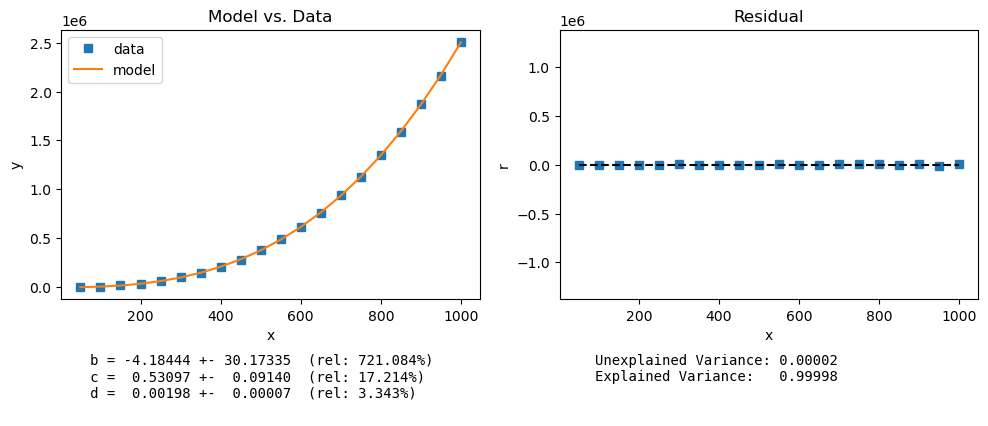

In [36]:
fit3xa, err3xa = classlib4334.fit_and_plot(p3xa, x, y, residual=True)

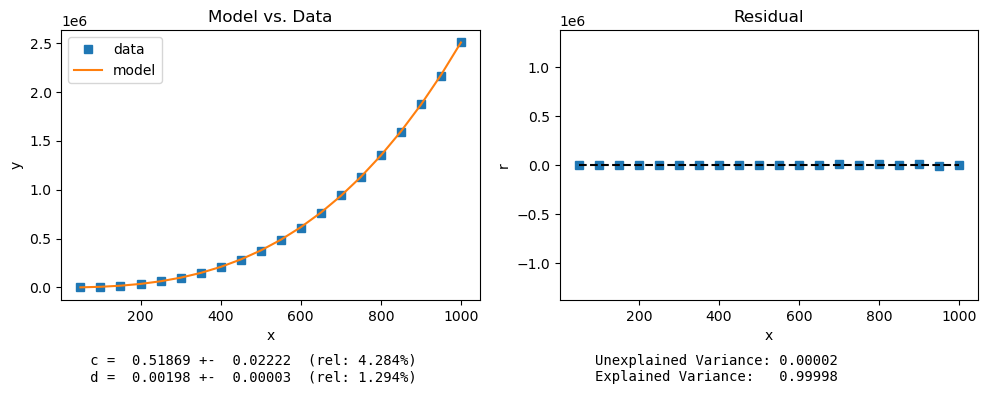

In [37]:
fit3xab, err3xab = classlib4334.fit_and_plot(p3xab, x, y, residual=True)

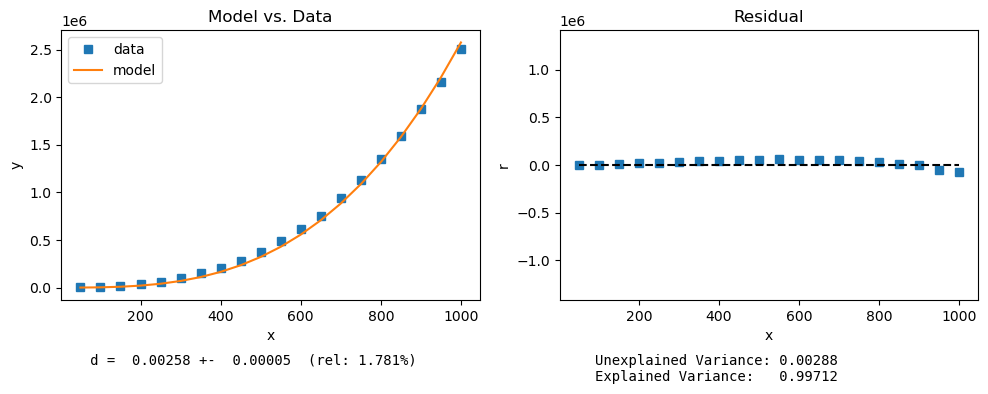

In [42]:
fit3xab, err3xab = classlib4334.fit_and_plot(p3xabc, x, y, residual=True)

In [38]:
classlib4334.compare_nested(x, y, p3xa, p3)

F-test comparing p3xa (simple) vs. p3 (complex)

  Simple:   SS=275613074.469788, DOF=  17
  Complex:  SS=271914068.245163, DOF=  16
  F-number: 0.2177 
  P-value:  0.6471 
  Random?   64.712%

It is recommended to prefer the simple function.



(0.21765736497549978, 0.6471198995549672)

In [40]:
classlib4334.compare_nested(x, y, p3xab, p3xa)

F-test comparing p3xab (simple) vs. p3xa (complex)

  Simple:   SS=276860336.719751, DOF=  18
  Complex:  SS=275613074.469788, DOF=  17
  F-number: 0.0769 
  P-value:  0.7848 
  Random?   78.484%

It is recommended to prefer the simple function.



(0.07693197534315396, 0.784843631457264)

In [41]:
classlib4334.compare_nested(x, y, p3xabc, p3xab)

F-test comparing p3xabc (simple) vs. p3xab (complex)

  Simple:   SS=33797345463.921303, DOF=  19
  Complex:  SS=276860336.719751, DOF=  18
  F-number: 2179.3253 
  P-value:  0.0000 
  Random?   0.000%

It is recommended to prefer the complex function.



(2179.325285226327, 3.09232662663279e-20)

In [43]:
p2xab(10_000, *fit2xab)

6529731.002307112

In [ ]:
x = df2["Inputs"]
y = df2["Runtime [ms]"]